<a href="https://colab.research.google.com/github/dkarakost/MBE_project/blob/main/TwoStepApproach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

if torch.__version__ != '2.5.1+cu124':
    !pip install torch==2.5.1+cu124 torchvision==0.20.1+cu124 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu124 -U --quiet
    print("PyTorch version updated to 2.5.1.")
else:
    print("PyTorch is already at the correct version (2.5.1).")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 123.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install d2l==1.0.3 --quiet
!pip install scipy --quiet
!pip install torchmetrics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sou

`Now restart the runtime for the pytorch version change to take effect.`

<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2FHGSSh.png&f=1&nofb=1&ipt=3138d8a64cabb6532ff6bd6bd61aede311aec0aaa97fddc911980eee8da014b8&ipo=images" width=800></center>

In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torchvision
from torchvision.transforms import ToPILImage
from torch import nn
from torch.nn import functional as F
from PIL import ImageFile, Image
import matplotlib.pyplot as plt
from object_detection_utils import ResizeWithBBox, plot_bbox, plot_grid, box_xyxy_to_cxcywh, box_xywh_to_xyxy
import random
import cv2

In [2]:
!git clone https://git.wur.nl/abe-datasets/education/fruit-detection-challenge.git

Cloning into 'fruit-detection-challenge'...
remote: Enumerating objects: 2010, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2010 (delta 2), reused 0 (delta 0), pack-reused 2004 (from 1)
Receiving objects: 100% (2010/2010), 255.89 MiB | 17.08 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (1958/1958), done.


In [3]:
import json

import torch
from PIL import Image
import numpy as np
import cv2

class FruitDetectionDataset(torch.utils.data.Dataset):
    def __init__(self, json_path, img_folder, img_size, transforms=None):
        """
        Constructor of the FruitDetectionDataset
        :param json_path: Path to the COCO JSON file
        :param img_folder: Folder containing the images
        :param img_size: Size to resize the images
        :param transforms: List of transformations to be applied to the data
        """
        self.img_folder = img_folder
        self.transforms = transforms
        self.resize = ResizeWithBBox(img_size)

        # Load the COCO JSON file
        with open(json_path, 'r') as f:
            coco_data = json.load(f)

        # Extract image info and annotations
        self.images = coco_data['images']
        self.annotations = coco_data['annotations']
        self.categories = coco_data['categories']

        # Create a mapping from category ID to category index
        self.category_id_to_index = {category['id']: idx for idx, category in enumerate(self.categories)}

        # Create a mapping from image ID to annotations
        self.img_id_to_annotations = {}
        for annotation in self.annotations:
            img_id = annotation['image_id']
            if img_id not in self.img_id_to_annotations:
                self.img_id_to_annotations[img_id] = []
            self.img_id_to_annotations[img_id].append(annotation)

        # Create a list of image paths
        self.img_files = [os.path.join(img_folder, img['file_name']) for img in self.images]

    def __getitem__(self, idx):
        # Get image path and annotations
        img_path = self.img_files[idx]
        img_id = self.images[idx]['id']
        annotations = self.img_id_to_annotations.get(img_id, [])

        # Load image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)

        # Extract bounding boxes and labels
        bboxes = []
        labels = []
        for annotation in annotations:
            x, y, width, height = annotation['bbox']
            bboxes.append([x, y, width, height])
            category_id = annotation['category_id']
            labels.append(self.category_id_to_index[category_id])

        bboxes = torch.tensor(bboxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        if len(bboxes.shape) == 1:
            bboxes = bboxes.unsqueeze(0)

        # Resize image and boxes
        img, bboxes = self.resize(image=img, boxes=bboxes)
        bboxes = box_xyxy_to_cxcywh(box_xywh_to_xyxy(torch.tensor(bboxes, dtype=torch.float32)))

        # Apply transforms
        if self.transforms:
            img = self.transforms(img)

        # Add illegal boxes if needed
        illegal_needed = 50 - len(bboxes)
        illegal_labels = torch.ones((illegal_needed,), dtype=torch.int64) * -1
        illegal_boxes = torch.zeros((illegal_needed, 4), dtype=torch.float32) * -1

        return img, {
            "labels": torch.cat((labels, illegal_labels)),
            "boxes": torch.cat((bboxes, illegal_boxes), axis=0),
        }

    def __len__(self):
        return len(self.img_files)


# The `Dataset` class
Now, let's create a dataset customized to our data.
We will call it `LeafDetectionDataset`.
* The constructor of the dataset (`__init__`) takes the root folder of the data, and finds the (sorted) path of all the images and bounding box annotations.
Lastly, it also has a `classes` variable. In our case, we only have one class: leaf.
* The `__get_item__` function gets the next image at index `idx` as well as the ground-truth bounding boxes.

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


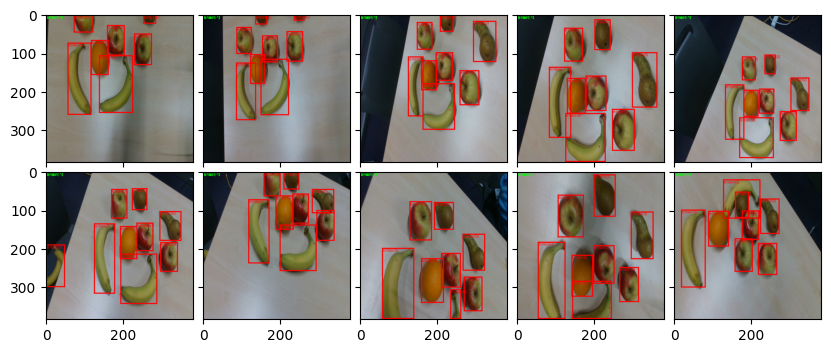

In [4]:
dataset_folder = 'leaf-dataset/detection'
import os
img_size = 384
batch_size = 16

augs = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = FruitDetectionDataset(
    "/content/fruit-detection-challenge/detection/annotations/train_one_class.json",
    "/content/fruit-detection-challenge/detection/train/",
    img_size=(img_size, img_size),
    transforms=augs,
)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)


val_dataset = FruitDetectionDataset(
    "/content/fruit-detection-challenge/detection/annotations/val_one_class.json",
    "/content/fruit-detection-challenge/detection/val/", # Corrected the image folder path
    img_size=(img_size, img_size),
    transforms=augs,
)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=1)

'''test_dataset = FruitDetectionDataset(
    #add here it is possible the test annotations,
    "/content/fruit-detection-challenge/detection/test/",
    img_size=(img_size, img_size),
    transforms=augs,
)'''

#test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=1)

display_imgs_bbox = []
for i in range(10):
    img, target = train_dataset[i]
    img = ToPILImage()(img)
    img = plot_bbox(img, target["boxes"] * img_size, target["labels"])
    display_imgs_bbox.append(img)

# Plot two grids, one per list (don't forget the functions declared in the beginning of this notebook)
plot_grid(imgs=display_imgs_bbox, nrows=2, ncols=5)

Model definition with a prediction head with :


*   Concolutional layers for feature extraciton
*   Box predictor
*   Classifier
*     objectness score



Resnet50

In [100]:
import torch
import torch.nn as nn
import torchvision.models as models

class PredictionHead(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(PredictionHead, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // 2, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(in_channels // 2),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels // 2, in_channels // 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels // 4, in_channels // 4, kernel_size=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
        )

        self.box_predictor = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.Sigmoid(),
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=num_classes, kernel_size=(3, 3), stride=(1, 1), padding=1),
        )

        # Objectness score predictor
        self.objectness_predictor = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=1, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        cls_logits = self.classifier(x)
        bbox_pred = self.box_predictor(x)
        objectness_pred = self.objectness_predictor(x)

        # Add relative grid position to the cx and cy predictions of each box
        grid_size = x.shape[-1]
        grid_y, grid_x = torch.meshgrid(
            torch.arange(grid_size, device=x.device), torch.arange(grid_size, device=x.device), indexing="ij"
        )
        cx = bbox_pred[:, 0, :, :]
        cy = bbox_pred[:, 1, :, :]
        w = bbox_pred[:, 2, :, :]
        h = bbox_pred[:, 3, :, :]
        cx = (cx + (grid_x)) / grid_size
        cy = (cy + (grid_y)) / grid_size
        bbox_pred = torch.stack([cx, cy, w, h], dim=1)

        return cls_logits, bbox_pred, objectness_pred


# Main detection model using a ReNet18 backbone. Multiscale prediction heads

class ObjectDetectorMultiScale(nn.Module):
    def __init__(self, n_classes, pretrained=True):
        super(ObjectDetectorMultiScale, self).__init__()

        # We add the background class
        self.n_classes = n_classes

        # Backbone
        backbone = models.resnet50(pretrained=pretrained)
        self.backbone = nn.Sequential(
        backbone.conv1,
        backbone.bn1,
        backbone.relu,
        backbone.maxpool,
        backbone.layer1,
        backbone.layer2,
        backbone.layer3)

        # Use layer4 for deeper features (output: 2048 channels)
        self.block_1 = backbone.layer4

        self.prediction_head = PredictionHead(2048, self.n_classes)
        self.prediction_head_2 = PredictionHead(1024, self.n_classes)

    def forward(self, x):
        features = self.backbone(x)
        y_ = self.block_1(features)

        cls_logits, bbox_pred, objectness_pred = self.prediction_head(y_)
        cls_preds = cls_logits.flatten(2, 3).permute(0, 2, 1)
        box_preds = bbox_pred.flatten(2, 3).permute(0, 2, 1)
        obj_preds = objectness_pred.flatten(2, 3).permute(0, 2, 1)

        cls_logits2, bbox_pred2, objectness_pred2 = self.prediction_head_2(features)
        cls_preds2 = cls_logits2.flatten(2, 3).permute(0, 2, 1)
        box_preds2 = bbox_pred2.flatten(2, 3).permute(0, 2, 1)
        obj_preds2 = objectness_pred2.flatten(2, 3).permute(0, 2, 1)

        # Concatenate predictions from all heads
        pred_logits = torch.cat([cls_preds, cls_preds2], dim=1)
        pred_boxes = torch.cat([box_preds, box_preds2], dim=1)
        pred_objectness = torch.cat([obj_preds, obj_preds2], dim=1)

        return {"pred_logits": pred_logits, "pred_boxes": pred_boxes, "pred_objectness": pred_objectness}

Using ResNet18

In [169]:
import torch
import torch.nn as nn
import torchvision.models as models


class PredictionHead(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(PredictionHead, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // 2, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(in_channels // 2),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels // 2, in_channels // 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels // 4, in_channels // 4, kernel_size=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
        )

        self.box_predictor = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.Sigmoid(),
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=num_classes, kernel_size=(3, 3), stride=(1, 1), padding=1),
        )

        # Objectness score predictor
        self.objectness_predictor = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=1, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.conv_layers(x)
        cls_logits = self.classifier(x)
        bbox_pred = self.box_predictor(x)
        objectness_pred = self.objectness_predictor(x)

        # Add relative grid position to the cx and cy predictions of each box
        grid_size = x.shape[-1]
        grid_y, grid_x = torch.meshgrid(
            torch.arange(grid_size, device=x.device), torch.arange(grid_size, device=x.device), indexing="ij"
        )
        cx = bbox_pred[:, 0, :, :]
        cy = bbox_pred[:, 1, :, :]
        w = bbox_pred[:, 2, :, :]
        h = bbox_pred[:, 3, :, :]
        cx = (cx + (grid_x)) / grid_size
        cy = (cy + (grid_y)) / grid_size
        bbox_pred = torch.stack([cx, cy, w, h], dim=1)

        return cls_logits, bbox_pred, objectness_pred


# Main detection model using a ReNet18 backbone. Multiscale prediction heads

class ObjectDetectorMultiScale(nn.Module):
    def __init__(self, n_classes, pretrained=True):
        super(ObjectDetectorMultiScale, self).__init__()

        # We add the background class
        self.n_classes = n_classes

        # Backbone
        backbone = models.resnet18(pretrained=pretrained)
        self.backbone = nn.Sequential(*list(backbone.children())[:-3])

        # Layer 1
        self.block_1 = nn.Sequential(*list(backbone.children())[-3])

        self.prediction_head = PredictionHead(512, self.n_classes)
        self.prediction_head_2 = PredictionHead(256, self.n_classes)

    def forward(self, x):
        features = self.backbone(x)
        y_ = self.block_1(features)

        cls_logits, bbox_pred, objectness_pred = self.prediction_head(y_)
        cls_preds = cls_logits.flatten(2, 3).permute(0, 2, 1)
        box_preds = bbox_pred.flatten(2, 3).permute(0, 2, 1)
        obj_preds = objectness_pred.flatten(2, 3).permute(0, 2, 1)

        cls_logits2, bbox_pred2, objectness_pred2 = self.prediction_head_2(features)
        cls_preds2 = cls_logits2.flatten(2, 3).permute(0, 2, 1)
        box_preds2 = bbox_pred2.flatten(2, 3).permute(0, 2, 1)
        obj_preds2 = objectness_pred2.flatten(2, 3).permute(0, 2, 1)

        # Concatenate predictions from all heads
        pred_logits = torch.cat([cls_preds, cls_preds2], dim=1)
        pred_boxes = torch.cat([box_preds, box_preds2], dim=1)
        pred_objectness = torch.cat([obj_preds, obj_preds2], dim=1)

        return {"pred_logits": pred_logits, "pred_boxes": pred_boxes, "pred_objectness": pred_objectness}

using anchors

Faster RCNN

In [150]:
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

def get_fasterrcnn_resnet18(num_classes):
    # Load a pre-trained Faster R-CNN model with a ResNet-50 backbone
    model = fasterrcnn_resnet50_fpn(pretrained=True)


    # Replace the backbone with ResNet-18
    backbone = models.resnet18(pretrained=True)
    # Remove the fully connected layers
    backbone = nn.Sequential(*list(backbone.children())[:-2])

    # Make the backbone output feature maps (FPN expects this format)
    backbone.out_channels = 512  # The output channels of ResNet-18

    # Add the new backbone to the Faster R-CNN model
    model.backbone = backbone

    # Replace the classifier with the number of classes in your dataset
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model


Training Setup: \
Hungarian matcher for matching predictions to ground truth

Multi-task loss (classification, bounding box regression, objectness)

Learning rate scheduling

Validation AP calculation

188.3 examples/sec on cuda:0


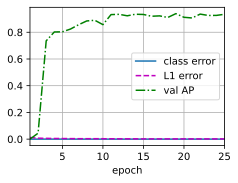

In [112]:
from object_detection_utils import *

def train_model(model, train_loader, val_loader, num_epochs=25, lr=1e-3, weight_decay=1e-4, step_size=20, gamma=0.1):
    device = d2l.try_gpu()
    model = model.to(device)
    matcher = HungarianMatcher()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    print("total num of parameters in the model:", sum(p.numel() for p in model.parameters()))

    timer = d2l.Timer()
    animator = d2l.Animator(xlabel="epoch", xlim=[1, num_epochs], legend=["class error", "L1 error", "val AP"])

    ap_calculator = APCalculator(val_loader)

    for epoch in range(num_epochs):
        metric = d2l.Accumulator(4)
        model.train()
        for img, targets in train_loader:
            timer.start()

            img = img.to(device)

            # Remove illegal targets
            new_targets = []
            for i in range(targets["labels"].shape[0]):
                labels = targets["labels"][i]
                boxes = targets["boxes"][i]
                new_targets.append({"labels": labels[labels != -1].to(device), "boxes": boxes[labels != -1].to(device)})

            outputs = model(img)

            num_boxes = sum(len(t["labels"]) for t in new_targets)
            num_boxes = torch.as_tensor([num_boxes], dtype=torch.float, device=next(iter(outputs.values())).device)

            src_logits = outputs["pred_logits"]
            src_boxes = outputs["pred_boxes"]
            src_objectness = outputs["pred_objectness"]

            indices = matcher(outputs, new_targets)  # Run matcher
            idx = get_src_permutation_idx(indices)

            # Loss class
            target_classes_o = torch.cat([t["labels"][J] for t, (_, J) in zip(new_targets, indices)])
            target_classes = torch.full(src_logits.shape[:2], -100, dtype=torch.int64, device=device)
            target_classes[idx] = target_classes_o
            loss_ce = F.cross_entropy(src_logits.transpose(1, 2), target_classes, ignore_index=-100)

            # Loss boxes L1 and GIOU
            src_boxes = src_boxes[idx]
            target_boxes = torch.cat([t["boxes"][i] for t, (_, i) in zip(new_targets, indices)], dim=0)

            loss_bbox = F.l1_loss(src_boxes, target_boxes, reduction="none")
            loss_bbox = loss_bbox.sum() / num_boxes

            # Loss objectness
            target_objectness = torch.zeros_like(src_objectness, device=device)
            target_objectness[idx] = 1
            loss_objectness = F.mse_loss(src_objectness, target_objectness, reduction="mean")

            # Sum the losses
            loss = loss_ce + loss_bbox + loss_objectness

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            metric.add(
                loss_ce.cpu().detach().numpy(),
                loss_bbox.cpu().detach().numpy(),
                loss_objectness.cpu().detach().numpy(),
                img.size()[0],
            )
        scheduler.step()
        cls_err, L1_error, obj_error = metric[0] / metric[3], metric[1] / metric[3], metric[2] / metric[3]
        ap = ap_calculator.calculate_map(model, nms_threshold=0.5)
        print(ap)
        animator.add(epoch + 1, (cls_err, L1_error, ap["map_50"]))
    print(f"{len(train_loader.dataset) / timer.stop():.1f} examples/sec on " f"{str(device)}")

# train_model(model, train_loader, val_loader)
model = ObjectDetectorMultiScale(n_classes=len(train_dataset.categories))
train_model(model, train_loader, val_loader, num_epochs=25, lr=5e-4, weight_decay=1e-4, step_size=10, gamma=0.1)


Show some predictions

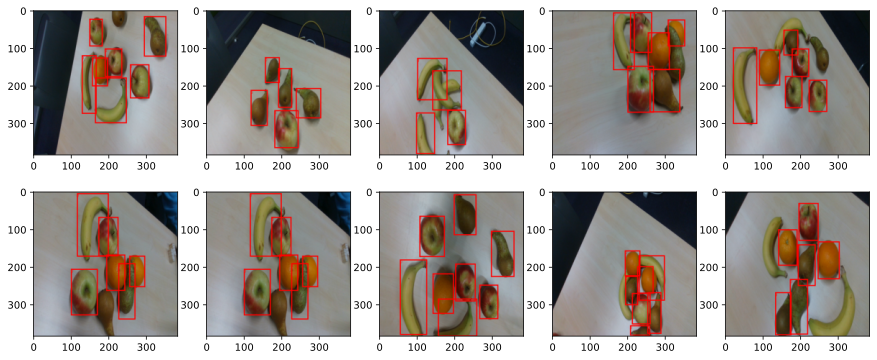

In [113]:
# Visualize some predictions
nrows, ncols = 2, 5
plt.figure(figsize=(15, 6))
for i in range(nrows * ncols):
    # Get a random image
    img, _ = train_dataset[random.randint(0, len(train_dataset) - 1)]
    # Get the predicted bboxes
    boxes, scores, top_class = predict(model, img, n_classes=4, nms_threshold=0.5, conf_threshold=0.5)
    # Plot it
    plot_img = plot_bbox(ToPILImage()(img), boxes, top_class.numpy())
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(plot_img)
plt.show()

Evaluation of the Model

In [168]:
ap_calculator = APCalculator(val_loader)
ap = ap_calculator.calculate_map(model, nms_threshold=0.5)

print(f"AP: {ap['map'].item():.4f}")
print(f"AP@50: {ap['map_50'].item():.4f}")
print(f"AP@75: {ap['map_75'].item():.4f}")
print(f"AP (small): {ap['map_small'].item():.4f}")
print(f"AP (medium): {ap['map_medium'].item():.4f}")
print(f"AP (large): {ap['map_large'].item():.4f}")
print(f"AR@1: {ap['mar_1'].item():.4f}")
print(f"AR@10: {ap['mar_10'].item():.4f}")
print(f"AR@100: {ap['mar_100'].item():.4f}")
print(f"AR (small): {ap['mar_small'].item():.4f}")
print(f"AR (medium): {ap['mar_medium'].item():.4f}")
print(f"AR (large): {ap['mar_large'].item():.4f}")
print(f"AP per class: {ap['map_per_class']}")
print(f"AR@100 per class: {ap['mar_100_per_class']}")
print(f"Classes: {ap['classes']}")

/usr/local/lib/python3.11/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)


AP: 0.4373
AP@50: 0.9346
AP@75: 0.3451
AP (small): 0.4373
AP (medium): -1.0000
AP (large): -1.0000
AR@1: 0.0875
AR@10: 0.4889
AR@100: 0.5042
AR (small): 0.5042
AR (medium): -1.0000
AR (large): -1.0000
AP per class: 0.4373320937156677
AR@100 per class: 0.5041666626930237
Classes: 0


Classification Model Setup




In [170]:
data_dir = "/content/fruit-detection-challenge/classification"

train_imgs = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'train'))
val_imgs = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'val'))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

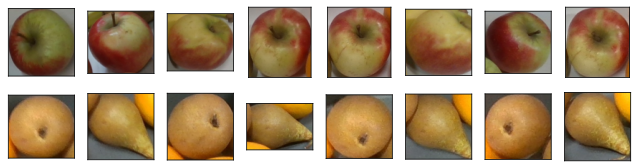

In [13]:
hotdogs = [train_imgs[i][0] for i in range(8)]
not_hotdogs = [train_imgs[-i - 1][0] for i in range(8)]
d2l.show_images(hotdogs + not_hotdogs, 2, 8, scale=1.4)

In [89]:
train_imgs.classes, train_imgs.class_to_idx

(['apple', 'banana', 'orange', 'pear'],
 {'apple': 0, 'banana': 1, 'orange': 2, 'pear': 3})

Classification model setup

In [171]:
# We specify the mean and variance of the three RGB channels to normalize the
# image channel
normalize = torchvision.transforms.Normalize(
    [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ColorJitter(brightness=0.4, contrast=0.4),
    torchvision.transforms.RandomAffine(10, shear=10),  # Random affine transform
    torchvision.transforms.ToTensor(),
    normalize])

val_augs = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    normalize])

Testing accuracy

In [177]:
def train_fine_tuning(net, learning_rate, batch_size=128, num_epochs=5,
                      param_group=True):
    train_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(
        os.path.join(data_dir, 'train'), transform=train_augs),
        batch_size=batch_size, shuffle=True)
    val_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(
        os.path.join(data_dir, 'val'), transform=val_augs),
        batch_size=batch_size)
    devices = d2l.try_all_gpus()
    loss = nn.CrossEntropyLoss(reduction="none")
    if param_group:
        params_1x = [param for name, param in net.named_parameters()
             if name not in ["fc.weight", "fc.bias"]]
        trainer = torch.optim.SGD([{'params': params_1x},
                                   {'params': net.fc.parameters(),
                                    'lr': learning_rate * 10}],
                                lr=learning_rate, weight_decay=0.01)
    else:
        trainer = torch.optim.SGD(net.parameters(), lr=learning_rate,
                                  weight_decay=0.01)
    d2l.train_ch13(net, train_iter, val_iter, loss, trainer, num_epochs,
                   devices)

Resnet 18

In [178]:
finetune_net = torchvision.models.resnet18(pretrained=True)
finetune_net.fc = nn.Linear(finetune_net.fc.in_features, 4)
nn.init.xavier_uniform_(finetune_net.fc.weight)

Parameter containing:
tensor([[-0.0598,  0.0526, -0.1022,  ...,  0.1019,  0.0938, -0.1061],
        [-0.0144, -0.0802, -0.0976,  ..., -0.0152,  0.0428,  0.0299],
        [ 0.0409, -0.0330,  0.0303,  ...,  0.0939,  0.0548,  0.0492],
        [ 0.0558, -0.0297,  0.0194,  ...,  0.0876, -0.0987, -0.1030]],
       requires_grad=True)

Resnet 50

In [165]:
finetune_net = torchvision.models.resnet50(pretrained=True)
finetune_net.fc = nn.Linear(finetune_net.fc.in_features, 4)  # Modify the final layer to 4 outputs (bounding box + class)
nn.init.xavier_uniform_(finetune_net.fc.weight)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Parameter containing:
tensor([[ 4.4287e-02, -2.9365e-02, -2.3319e-03,  ...,  2.3053e-02,
          4.6762e-02,  1.6771e-02],
        [ 7.8656e-03,  3.1644e-05, -2.4662e-02,  ...,  1.6235e-02,
         -2.7171e-02,  3.9580e-02],
        [ 1.1587e-02, -1.5358e-02,  2.0583e-02,  ...,  5.1031e-02,
          4.6264e-02,  7.6244e-03],
        [-5.3510e-02, -2.7416e-03,  4.0201e-02,  ..., -2.5823e-02,
         -2.8990e-02,  1.0203e-02]], requires_grad=True)

classification model training

KeyboardInterrupt: 

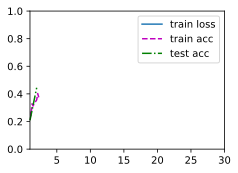

In [179]:
train_fine_tuning(finetune_net, 0.001, num_epochs=30)

2 stage prediction pipeline

In [158]:
from torch.utils.data import Dataset
from PIL import Image
import os

class TestImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.img_files = sorted([os.path.join(img_dir, f)
                                 for f in os.listdir(img_dir) if f.lower().endswith(('jpg', 'jpeg', 'png'))])
        self.transform = transform
        self.images = [{"id": i} for i in range(len(self.img_files))]  # dummy ids

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_path = self.img_files[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, 0  # dummy label


In [159]:
def predict_test_set_two_stages(model, test_dataset, output_txt_path, classifier_model, score_threshold=0.3, nms_threshold=0.3):
    """
    Predict bounding boxes for all images in the test dataset and use finetune_net to classify the boxes.
    Saves results to a text file: file_name, cx, cy, w, h, label, score
    """
    model.eval()
    classifier_model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    classifier_model.to(device)

    # For processing classifier inputs
    val_transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize
    ])

    with open(output_txt_path, "w") as out_file:
        for i in range(len(test_dataset)):
            # Load data
            img, _ = test_dataset[i]
            img_path = test_dataset.img_files[i]
            img_id = test_dataset.images[i]["id"]
            # Load original image without transforms
            pil_img = Image.open(img_path).convert("RGB")
            pil_img = pil_img.resize((img_size, img_size))

            # Detect boxes
            boxes, scores, _ = predict(model, img,
                                     n_classes=1, nms_threshold=nms_threshold, conf_threshold=score_threshold)
            print(img_path, boxes, scores)
            if len(boxes) > 0:
                # Convert boxes to original image coordinates
                boxes_orig = boxes.clone() / img_size  # Normalize to 0-1 range

                # Extract each detected object and classify it
                file_name = os.path.basename(img_path)
                for j, (box, sc) in enumerate(zip(boxes, scores)):
                    # Convert box from [cx, cy, w, h] format to [x1, y1, x2, y2]
                    cx, cy, w, h = box.tolist()
                    x1 = max(0, int((cx - w/2)))
                    y1 = max(0, int((cy - h/2)))
                    x2 = min(img_size, int((cx + w/2)))
                    y2 = min(img_size, int((cy + h/2)))

                    # Crop the region from the image
                    crop = pil_img.crop((x1, y1, x2, y2))

                    # Preprocess crop for classification
                    crop_tensor = val_transform(crop).unsqueeze(0).to(device)

                    # Get classification
                    with torch.no_grad():
                        class_output = classifier_model(crop_tensor)
                        class_id = torch.argmax(class_output, dim=1).item()
                    print(class_id)
                    # Write to file
                    box_norm = boxes_orig[j]
                    cx, cy, w, h = box_norm.tolist()
                    out_file.write(f"{file_name}, {cx}, {cy}, {w}, {h}, {class_id + 1}, {sc}\n")
            else:
                # No detections for this image
                file_name = os.path.basename(img_path)
                # out_file.write(f"{file_name}, 0, 0, 0, 0, 0, 0\n")  # Write empty detection

    print(f"Two-stage predictions saved to {output_txt_path}")



In [161]:
img_size = 384  # or whatever your detection model expects

test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((img_size, img_size)),
    torchvision.transforms.ToTensor(),
])

test_dataset = TestImageDataset("/content/fruit-detection-challenge/test", transform=test_transform)

predict_test_set_two_stages(model, test_dataset, "predictions_two_stage.txt", finetune_net,
                             score_threshold=0.5, nms_threshold=0.5)

/content/fruit-detection-challenge/test/color_001.png tensor([[243.2787, 118.7188, 121.7512, 113.1496],
        [141.0156, 201.6042,  61.9613,  66.5076],
        [236.6423, 240.3500,  86.8590, 126.5385]], grad_fn=<MulBackward0>) tensor([1., 1., 1.], grad_fn=<IndexBackward0>)
1
0
1
/content/fruit-detection-challenge/test/color_002.png tensor([[266.6274, 207.8381,  78.4864, 126.7588]], grad_fn=<MulBackward0>) tensor([1.], grad_fn=<IndexBackward0>)
1
/content/fruit-detection-challenge/test/color_003.png tensor([[306.5474, 306.9467,  71.0083,  65.1229]], grad_fn=<MulBackward0>) tensor([1.], grad_fn=<IndexBackward0>)
1
/content/fruit-detection-challenge/test/color_004.png tensor([[264.0752,  72.5066,  58.7858, 110.7148],
        [326.9630, 122.6423,  74.0579, 121.5975],
        [277.9244, 200.4247,  74.1557, 118.1272],
        [  7.6521, 312.5655,  23.9504,  60.1862],
        [ 16.4618, 363.5862,  35.5976,  37.0554]], grad_fn=<MulBackward0>) tensor([1., 1., 1., 1., 1.], grad_fn=<IndexBackwa

For ResNet 50

In [19]:
def predict_test_set_two_stages(model, test_dataset, output_txt_path, classifier_model, score_threshold=0.3, nms_threshold=0.3, img_size=384):
    """
    Predict bounding boxes for all images in the test dataset and use finetune_net to classify the boxes.
    Saves results to a text file: file_name, cx, cy, w, h, label, score
    """
    model.eval()
    classifier_model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    classifier_model.to(device)

    # For processing classifier inputs
    val_transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize
    ])

    with open(output_txt_path, "w") as out_file:
        for i in range(len(test_dataset)):
            # Load data
            img, _ = test_dataset[i]
            img_path = test_dataset.img_files[i]
            img_id = test_dataset.images[i]["id"]
            # Load original image without transforms
            pil_img = Image.open(img_path).convert("RGB")
            pil_img = pil_img.resize((img_size, img_size))  # Use img_size here

            # Detect boxes
            boxes, scores, _ = predict(model, img,
                                     n_classes=1, nms_threshold=nms_threshold, conf_threshold=score_threshold)
            print(img_path, boxes, scores)
            if len(boxes) > 0:
                # Convert boxes to original image coordinates
                boxes_orig = boxes.clone() / img_size  # Normalize to 0-1 range

                # Extract each detected object and classify it
                file_name = os.path.basename(img_path)
                for j, (box, sc) in enumerate(zip(boxes, scores)):
                    # Convert box from [cx, cy, w, h] format to [x1, y1, x2, y2]
                    cx, cy, w, h = box.tolist()
                    x1 = max(0, int((cx - w/2)))
                    y1 = max(0, int((cy - h/2)))
                    x2 = min(img_size, int((cx + w/2)))
                    y2 = min(img_size, int((cy + h/2)))

                    # Crop the region from the image
                    crop = pil_img.crop((x1, y1, x2, y2))

                    # Preprocess crop for classification
                    crop_tensor = val_transform(crop).unsqueeze(0).to(device)

                    # Get classification
                    with torch.no_grad():
                        class_output = classifier_model(crop_tensor)
                        class_id = torch.argmax(class_output, dim=1).item()
                    print(class_id)
                    # Write to file
                    box_norm = boxes_orig[j]
                    cx, cy, w, h = box_norm.tolist()
                    out_file.write(f"{file_name}, {cx}, {cy}, {w}, {h}, {class_id + 1}, {sc}\n")
            else:
                # No detections for this image
                file_name = os.path.basename(img_path)
                # out_file.write(f"{file_name}, 0, 0, 0, 0, 0, 0\n")  # Write empty detection

    print(f"Two-stage predictions saved to {output_txt_path}")


In [20]:
img_size = 384  # Ensure this matches the input size expected by your detection model

test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((img_size, img_size)),
    torchvision.transforms.ToTensor(),
])

test_dataset = TestImageDataset("/content/fruit-detection-challenge/test", transform=test_transform)

# Run predictions
predict_test_set_two_stages(
    model,
    test_dataset,
    "predictions_two_stage.txt",
    finetune_net,  # your classifier
    score_threshold=0.5,
    nms_threshold=0.5,
    img_size=img_size  # Make sure this gets passed if you updated the function
)


/content/fruit-detection-challenge/test/color_001.png tensor([], size=(0, 4), grad_fn=<MulBackward0>) tensor([], grad_fn=<IndexBackward0>)
/content/fruit-detection-challenge/test/color_002.png tensor([[268.0029, 326.1969,  55.1030, 108.9107]], grad_fn=<MulBackward0>) tensor([1.], grad_fn=<IndexBackward0>)
1
/content/fruit-detection-challenge/test/color_003.png tensor([[173.0905,  50.3289,  38.1373,  68.0756],
        [208.6007, 145.6531, 126.0826, 150.1685],
        [330.8715, 326.7625, 111.7548, 112.5462]], grad_fn=<MulBackward0>) tensor([1., 1., 1.], grad_fn=<IndexBackward0>)
1
1
1
/content/fruit-detection-challenge/test/color_004.png tensor([[208.6068,  47.5635,  66.7338, 105.2732],
        [267.3573,  71.4875,  67.2316, 116.1831],
        [325.4479, 120.6418,  90.4756, 137.4269],
        [280.5946, 197.5127,  73.7524, 123.3036],
        [  7.4439, 315.0225,  20.0207,  51.7026],
        [210.3361, 301.0591,  69.0112, 173.6495],
        [ 14.9904, 363.8854,  28.7661,  33.8341]], grad